In [1]:
import numpy as np
import torch
from torch import optim
import os
import sys
sys.path.append('C:\\Users\\chris\\Desktop\\Masterarbeit\\code')
from utils.dataloader import get_data_loader
from networks.cnn import CNN, CNN_pool
import matplotlib.pyplot as plt
import pyreadr

# Results from all image fit PL

In [40]:
exp = "exp_2"
path = f'../data/{exp}/data/'
brown_params = np.unique(pyreadr.read_r(path+"brown_test_params.RData")["test_params"].to_numpy(), axis = 0)
schlather_params = np.unique(pyreadr.read_r(path+"schlather_test_params.RData")["test_params"].to_numpy(), axis = 0)

In [41]:
path = f'../data/{exp}/results/'
brown_res = pyreadr.read_r(path+"brown_fit_all_images.RData")["res"].to_numpy()
schlather_res = pyreadr.read_r(path+"schlather_fit_all_images.RData")["res"].to_numpy()[:,1:]

In [42]:
#Brown results
res = brown_params-brown_res
rmse = np.sqrt(np.mean(np.power(res,2), axis = 0))
mae = np.mean(np.abs(res), axis = 0)
print(rmse)
print(mae)

[0.52283179 0.39617142]
[0.40970033 0.32178452]


In [43]:
#Schlather results
res = schlather_params-schlather_res
rmse = np.sqrt(np.mean(np.power(res,2), axis = 0))
mae = np.mean(np.abs(res), axis = 0)
print(rmse)
print(mae)

[3.84299661 0.47828069]
[2.34036376 0.4088549 ]


# Results CNN Brown

In [3]:
# Dataloader
exp = "exp_2"
path = f"../data/{exp}/data/"
model = "brown"
dataloader, dataset = get_data_loader(data_path = path, model = model, batch_size=800, var = "test")

In [4]:
#Load model
net = CNN()
net.load_state_dict(torch.load(f"../data/exp_2/checkpoints/cnn_{model}.pt"))
net.eval()

CNN(
  (conv_1): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv_3): Conv2d(128, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_1): Linear(in_features=256, out_features=4, bias=True)
  (linear_2): Linear(in_features=4, out_features=8, bias=True)
  (linear_3): Linear(in_features=8, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=2, bias=True)
)

In [5]:
for sample in dataloader:
    img, param = sample
    break 
pred = net(img).detach().numpy()
param = param.detach().numpy()

# Calculate metrics

In [6]:
def retransform(params):
    result = np.zeros(shape = params.shape)
    result[:,0] = np.exp(params[:,0])
    result[:,1] = (2*np.exp(params[:,1]))/(1+np.exp(params[:,1]))
    return result    

In [7]:
pred_tf = retransform(pred)
param_tf = np.round(retransform(param),3)

In [8]:
rmse = np.sqrt(np.mean((np.power(pred_tf-param_tf,2)), axis = 0))
mae = np.mean(np.abs(pred_tf-param_tf), axis = 0)
bias = np.mean(pred_tf-param_tf, axis = 0)
print(f"RMSE: {np.round(rmse,2)}")
print(f"MAE: {np.round(mae,2)}")
print(f"Bias: {np.round(bias,2)}")

RMSE: [0.24 0.19]
MAE: [0.16 0.15]
Bias: [ 0.11 -0.02]


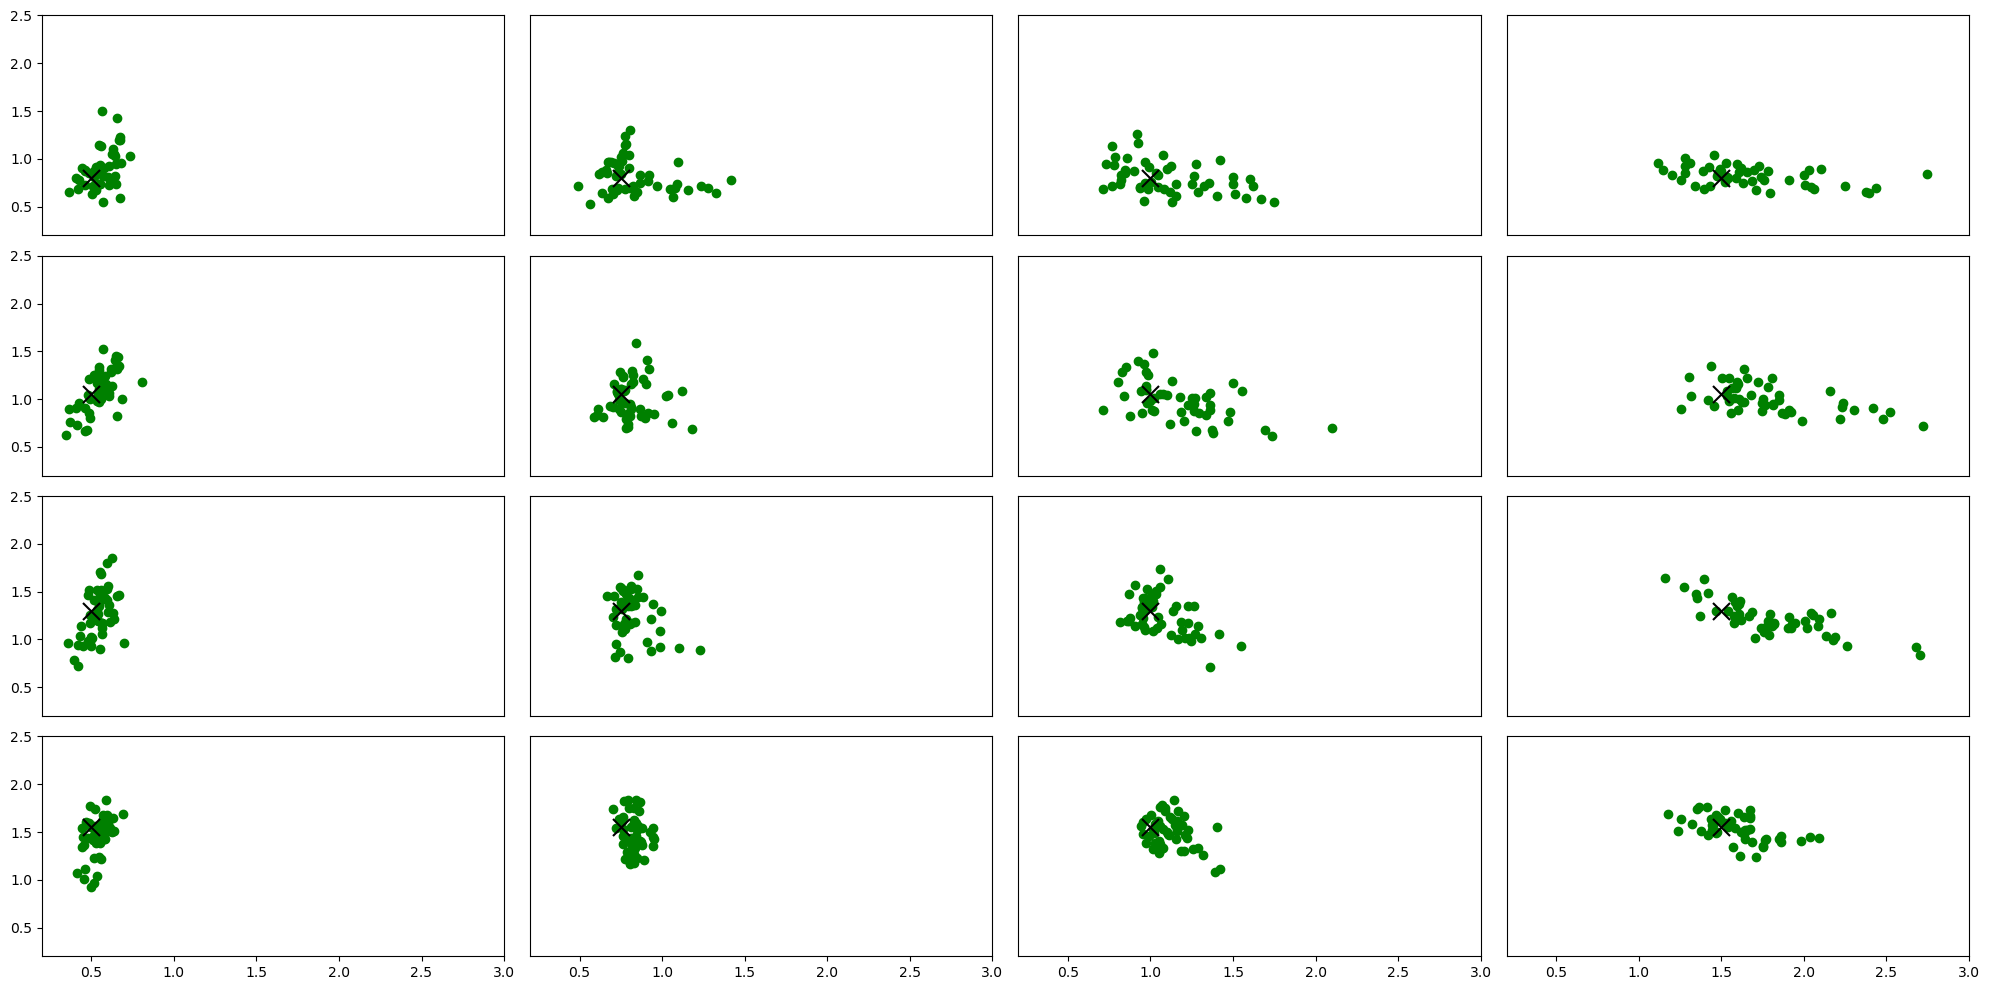

In [24]:
n_comb = 16
fig, axs = plt.subplots(4,4,figsize = (20,10))
axs = axs.ravel()
for i in range(n_comb):
    axs[i].scatter(x = pred_tf[(i*50):((i+1)*50),0], y = pred_tf[(i*50):((i+1)*50),1], color = "green")
    axs[i].scatter(x = param_tf[5+(i*50),0], y = param_tf[5+(i*50),1], color = "black", marker = "x", s = 150)
    axs[i].set_xlim([0.2,3])
    axs[i].set_ylim([0.2,2.5])
    
    if i < 12:
        axs[i].get_xaxis().set_visible(False)
    if (i%4) != 0:
        axs[i].get_yaxis().set_visible(False)  
        
fig.tight_layout()

#plt.savefig(plot_path+"metrics_scatter_convergence.png", dpi = 300, bbox_inches = "tight")

# Results CNN Schlather

In [74]:
# Dataloader
exp = "exp_2"
path = f"../data/{exp}/data/"
model = "schlather"
dataloader, dataset = get_data_loader(data_path = path, model = model, batch_size=800, var = "test")

In [77]:
#Load model
net = CNN()
net.load_state_dict(torch.load(f"../data/exp_2/checkpoints/cnn_{model}.pt"))
net.eval()

CNN(
  (conv_1): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv_3): Conv2d(128, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_1): Linear(in_features=256, out_features=4, bias=True)
  (linear_2): Linear(in_features=4, out_features=8, bias=True)
  (linear_3): Linear(in_features=8, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=2, bias=True)
)

In [78]:
for sample in dataloader:
    img, param = sample
    break 
pred = net(img).detach().numpy()
param = param.detach().numpy()

# Calculate metrics

In [79]:
def retransform(params):
    result = np.zeros(shape = params.shape)
    result[:,0] = np.exp(params[:,0])
    result[:,1] = (2*np.exp(params[:,1]))/(1+np.exp(params[:,1]))
    return result    

In [80]:
pred_tf = retransform(pred)
param_tf = np.round(retransform(param),3)

In [81]:
rmse = np.sqrt(np.mean((np.power(pred_tf-param_tf,2)), axis = 0))
mae = np.mean(np.abs(pred_tf-param_tf), axis = 0)
bias = np.mean(pred_tf-param_tf, axis = 0)
print(f"RMSE: {np.round(rmse,2)}")
print(f"MAE: {np.round(mae,2)}")
print(f"Bias: {np.round(bias,2)}")

RMSE: [0.5  0.25]
MAE: [0.38 0.19]
Bias: [-0.2  -0.04]


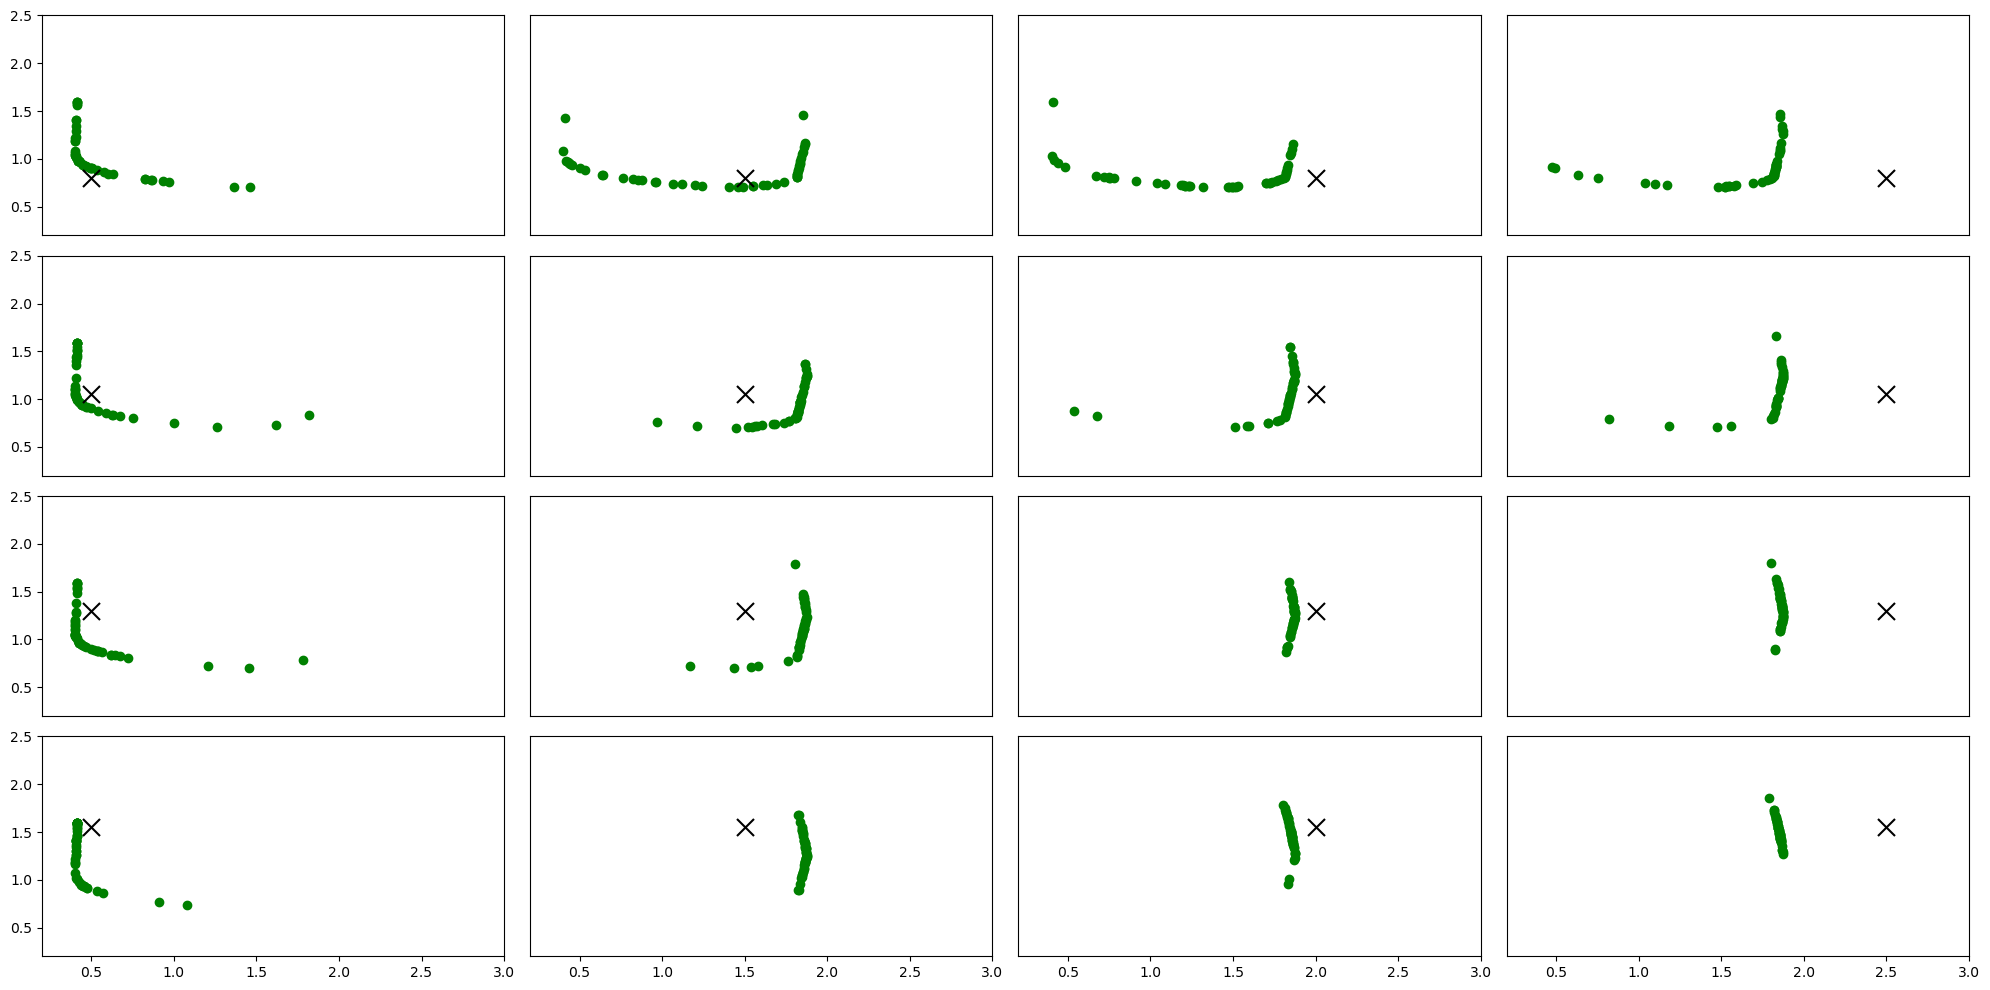

In [82]:
n_comb = 16
fig, axs = plt.subplots(4,4,figsize = (20,10))
axs = axs.ravel()
for i in range(n_comb):
    axs[i].scatter(x = pred_tf[(i*50):((i+1)*50),0], y = pred_tf[(i*50):((i+1)*50),1], color = "green")
    axs[i].scatter(x = param_tf[5+(i*50),0], y = param_tf[5+(i*50),1], color = "black", marker = "x", s = 150)
    axs[i].set_xlim([0.2,3])
    axs[i].set_ylim([0.2,2.5])
    
    if i < 12:
        axs[i].get_xaxis().set_visible(False)
    if (i%4) != 0:
        axs[i].get_yaxis().set_visible(False)  
        
fig.tight_layout()

#plt.savefig(plot_path+"metrics_scatter_convergence.png", dpi = 300, bbox_inches = "tight")

# Results with Likelihood

In [10]:
ml_path = f'../data/{exp}/results/'
ml_data = pyreadr.read_r(ml_path+model+"_mle2.RData")["results"].to_numpy()

In [11]:
rmse = np.sqrt(np.mean((np.power(ml_data-param_tf,2)), axis = 0))
mae = np.mean(np.abs(ml_data-param_tf), axis = 0)
bias = np.mean(ml_data-param_tf, axis = 0)
print(f"RMSE: {np.round(rmse,2)}")
print(f"MAE: {np.round(mae,2)}")
print(f"Bias: {np.round(bias,2)}")

RMSE: [0.53 0.2 ]
MAE: [0.43 0.16]
Bias: [0.42 0.01]


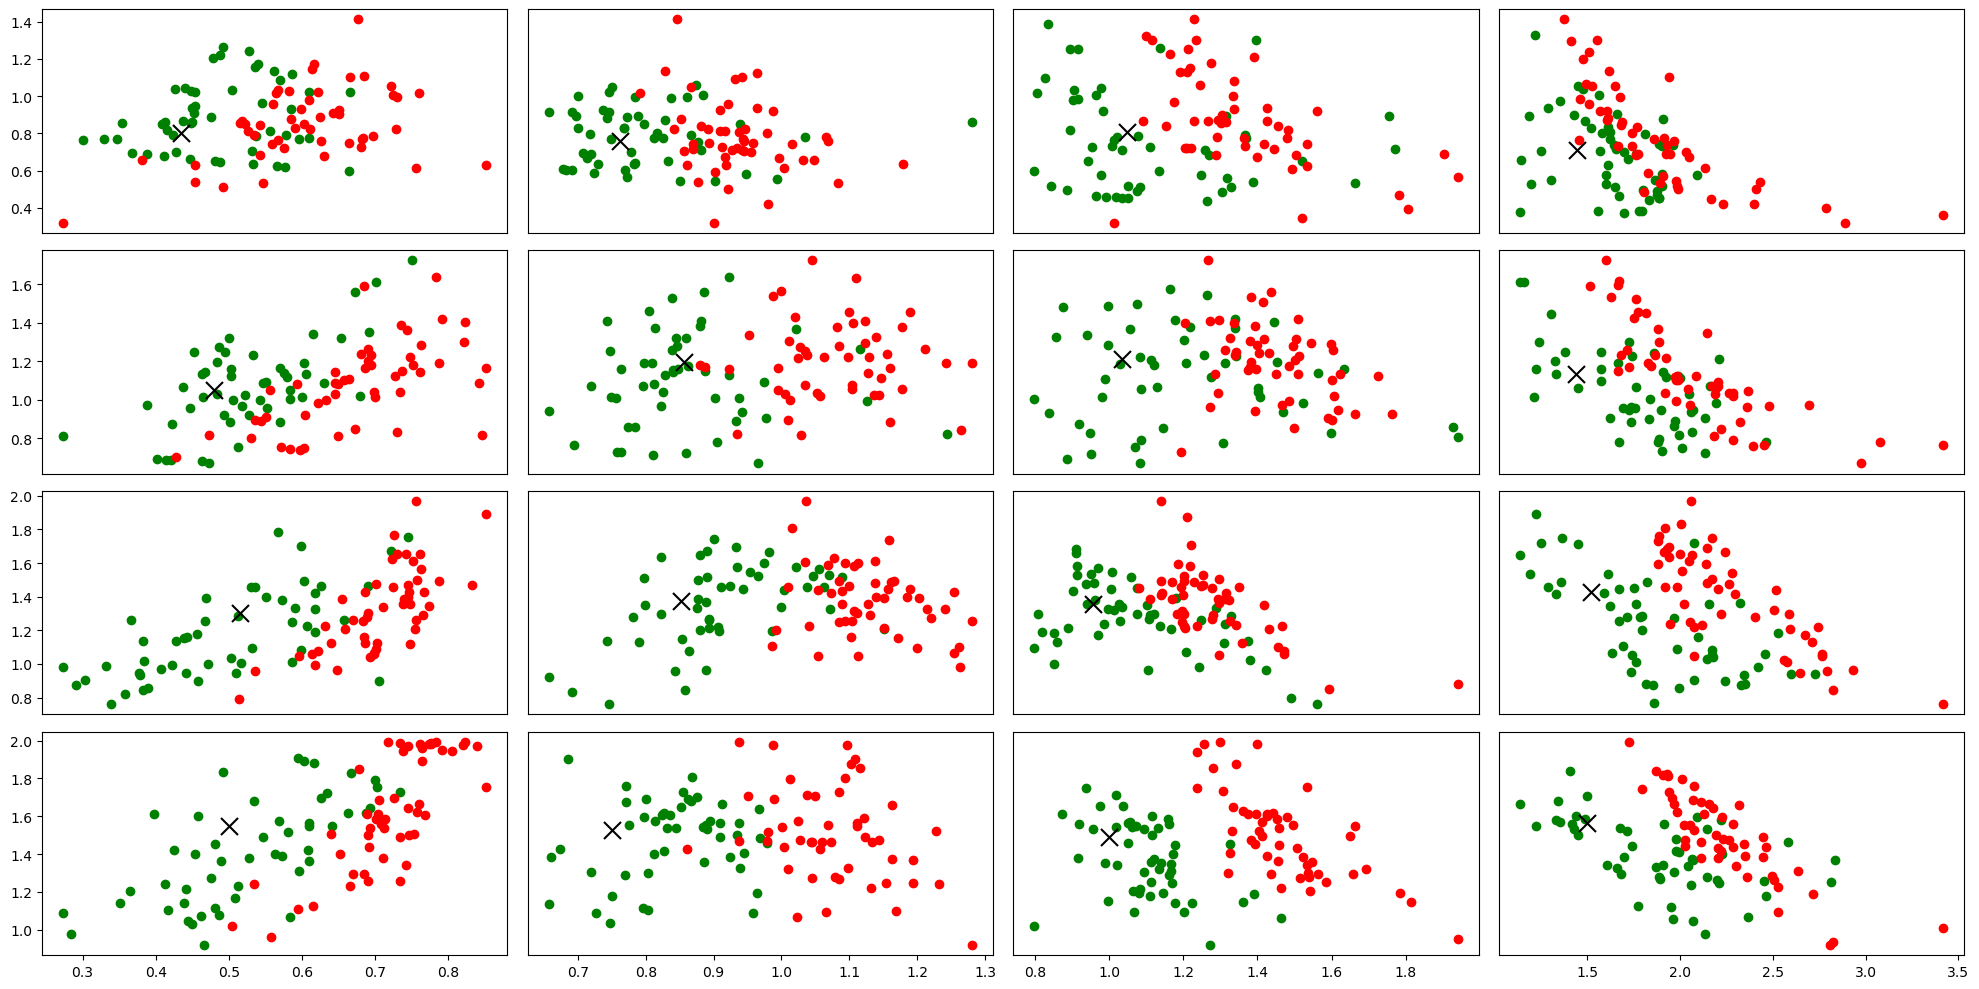

In [12]:
n_comb = 16
fig, axs = plt.subplots(4,4,figsize = (20,10))
axs = axs.ravel()
for i in range(n_comb):
    axs[i].scatter(x = pred_tf[(i*50):((i+1)*50),0], y = pred_tf[(i*50):((i+1)*50),1], color = "green")
    axs[i].scatter(x = ml_data[(i*50):((i+1)*50),0], y = ml_data[(i*50):((i+1)*50),1], color = "red")
    axs[i].scatter(x = param_tf[5+(i*50),0], y = param_tf[5+(i*50),1], color = "black", marker = "x", s = 150)
    if i < 12:
        axs[i].get_xaxis().set_visible(False)
    if (i%4) != 0:
        axs[i].get_yaxis().set_visible(False)  
        
fig.tight_layout()
plt.savefig(plot_path+"metrics_scatter_mle.png", dpi = 300, bbox_inches = "tight")